# GRIP : The Spark Foundation

## Data Science and Business Analytics Intern

## Author : Purba Chakraborty

## Prediction using Decision Tree Algorithm
(Level - Intermediate)

In this task we have to Create the Decision Tree classifier and visualize it graphically.
 The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.

# Importing required libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.tree  import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')


# Importing Dataset 

In [4]:
data=pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data.shape

(150, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Checking for missing values

In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is no missing values .

#  Dropping the Id column

In [8]:
data.drop("Id", axis=1 , inplace=True)

In [9]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
data.describe(include="all")

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


# Checking for duplicate values


In [11]:
data.duplicated().sum()

3

# Dropping The Duplicates Values

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.shape

(147, 5)

Here we remove all the duplicates value .

#  Displaying unique values

In [14]:
data.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

# Checking for any outliers in the numeric data

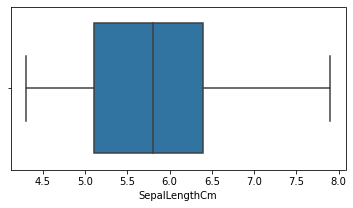

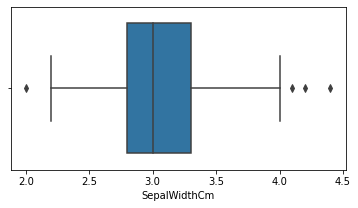

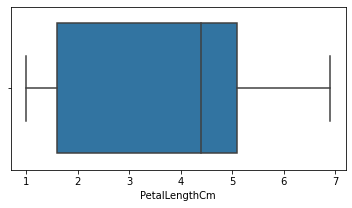

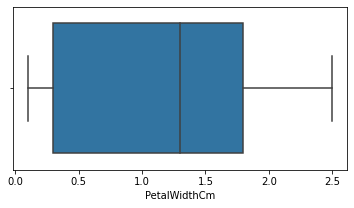

In [15]:
for i in data.columns:
    if data[i].dtype=='float64':
        plt.figure(figsize=(6,3))
        sns.boxplot(data[i])
        plt.show()

# Treating outliers present in the SepalwidthCm column

<AxesSubplot:xlabel='SepalWidthCm'>

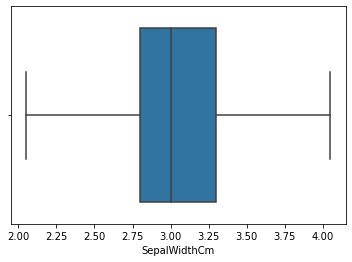

In [16]:
q1,q3=np.percentile(data['SepalWidthCm'],[25,75])
iqr=q3-q1
lower_fence=q1-(1.5*iqr)
upper_fence=q3+(1.5*iqr)
data['SepalWidthCm'] = data['SepalWidthCm'].apply(lambda x: upper_fence if x>upper_fence 
                                                  else lower_fence if x<lower_fence else x)
sns.boxplot(data['SepalWidthCm'])

# Understanding the data


In [17]:
print(data.Species.value_counts())

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64


<AxesSubplot:xlabel='Species', ylabel='count'>

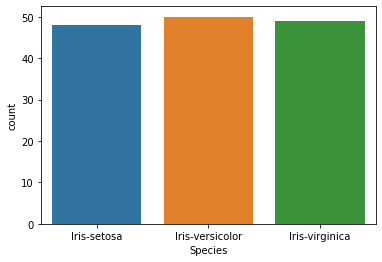

In [18]:
sns.countplot(data.Species)

In [19]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

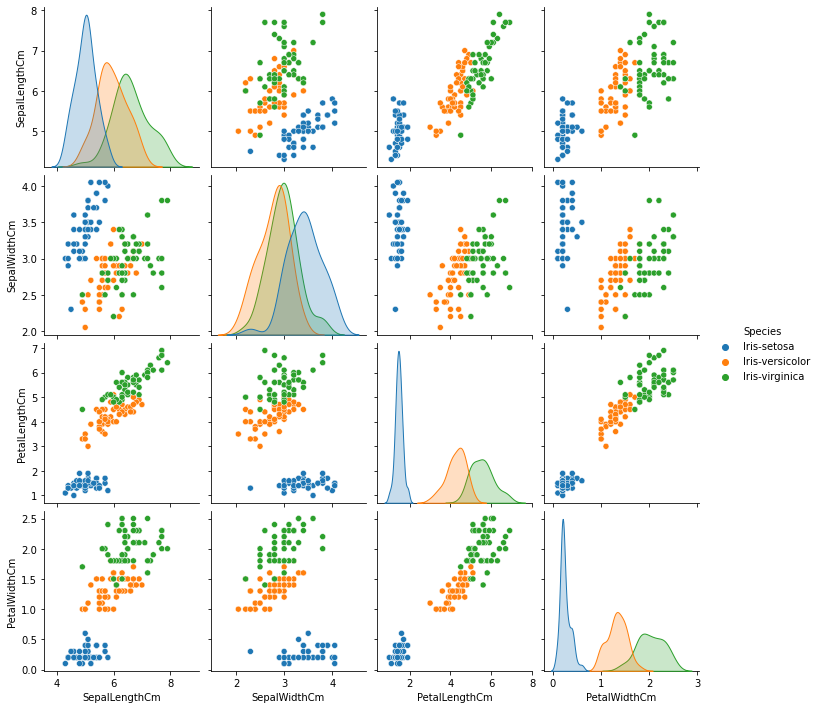

In [20]:
sns.pairplot(data,hue='Species')

From these figures we can conclude that 

1.Iris-setosa can be easily identified whreras Iris-versicolor and Iris-virginica are overlapping .

2. Petal length and petal width are the most important features to identify the flowers .

# Correlation matrix 

In [22]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.110155,0.871305,0.817058
SepalWidthCm,-0.110155,1.000000,-0.420140,-0.355139
PetalLengthCm,0.871305,-0.420140,1.000000,0.961883
PetalWidthCm,0.817058,-0.355139,0.961883,1.000000


<AxesSubplot:>

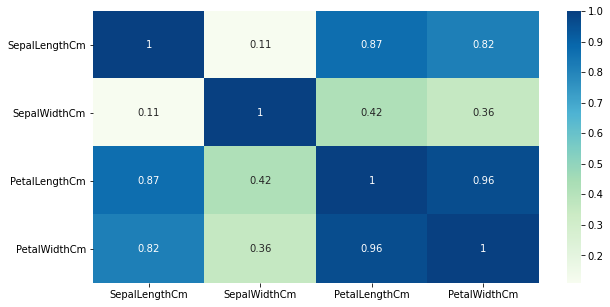

In [23]:
plt.figure(figsize=(10,5))
sns.heatmap(abs(data.corr()), cmap='GnBu', annot=True)

Here we can observe that PetallengthCm and PetalWidthCm has stronger correlation .

# Finding the optimum number of clusters for k-means classification

In [24]:
x = data.iloc[:, [0, 1, 2, 3]].values

In [25]:
from sklearn.cluster import KMeans

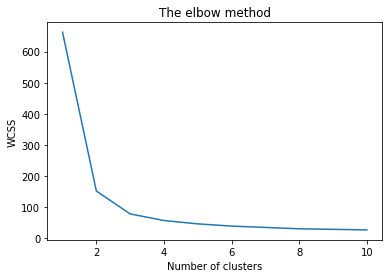

In [26]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

we can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as 3.

# Applying kmeans to the dataset / Creating the kmeans classifier

In [27]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Visualising the clusters - On the first two columns

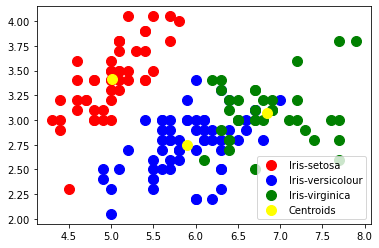

In [28]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [29]:
data['cluster'] = kmeans.labels_

data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,1
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [30]:
display(data['cluster'].value_counts(), data['Species'].value_counts())

1    61
0    48
2    38
Name: cluster, dtype: int64

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

In [31]:
data['Species_encoded'] = data['Species'].apply(lambda x: 1 if x=='Iris-setosa' else 2 if x=='Iris-virginica' else 0)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0,1
1,4.9,3.0,1.4,0.2,Iris-setosa,0,1
2,4.7,3.2,1.3,0.2,Iris-setosa,0,1
3,4.6,3.1,1.5,0.2,Iris-setosa,0,1
4,5.0,3.6,1.4,0.2,Iris-setosa,0,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,2
146,6.3,2.5,5.0,1.9,Iris-virginica,1,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2,2


# Classification report

In [32]:
from sklearn.metrics import classification_report
print(classification_report(data['Species_encoded'],data['cluster']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        48
           2       0.95      0.73      0.83        49

    accuracy                           0.24       147
   macro avg       0.32      0.24      0.28       147
weighted avg       0.32      0.24      0.28       147



# Confusion Matrix

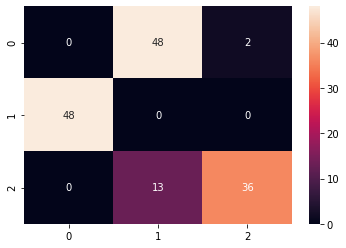

In [33]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(data['Species_encoded'],data['cluster']), annot=True);

# Decision Tree Algorithm

Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too.The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.

## Preparation of the data for training 

In [55]:
X= data.iloc[:,:4].values  

In [57]:
print(X)


[[5.1  3.5  1.4  0.2 ]
 [4.9  3.   1.4  0.2 ]
 [4.7  3.2  1.3  0.2 ]
 [4.6  3.1  1.5  0.2 ]
 [5.   3.6  1.4  0.2 ]
 [5.4  3.9  1.7  0.4 ]
 [4.6  3.4  1.4  0.3 ]
 [5.   3.4  1.5  0.2 ]
 [4.4  2.9  1.4  0.2 ]
 [4.9  3.1  1.5  0.1 ]
 [5.4  3.7  1.5  0.2 ]
 [4.8  3.4  1.6  0.2 ]
 [4.8  3.   1.4  0.1 ]
 [4.3  3.   1.1  0.1 ]
 [5.8  4.   1.2  0.2 ]
 [5.7  4.05 1.5  0.4 ]
 [5.4  3.9  1.3  0.4 ]
 [5.1  3.5  1.4  0.3 ]
 [5.7  3.8  1.7  0.3 ]
 [5.1  3.8  1.5  0.3 ]
 [5.4  3.4  1.7  0.2 ]
 [5.1  3.7  1.5  0.4 ]
 [4.6  3.6  1.   0.2 ]
 [5.1  3.3  1.7  0.5 ]
 [4.8  3.4  1.9  0.2 ]
 [5.   3.   1.6  0.2 ]
 [5.   3.4  1.6  0.4 ]
 [5.2  3.5  1.5  0.2 ]
 [5.2  3.4  1.4  0.2 ]
 [4.7  3.2  1.6  0.2 ]
 [4.8  3.1  1.6  0.2 ]
 [5.4  3.4  1.5  0.4 ]
 [5.2  4.05 1.5  0.1 ]
 [5.5  4.05 1.4  0.2 ]
 [5.   3.2  1.2  0.2 ]
 [5.5  3.5  1.3  0.2 ]
 [4.4  3.   1.3  0.2 ]
 [5.1  3.4  1.5  0.2 ]
 [5.   3.5  1.3  0.3 ]
 [4.5  2.3  1.3  0.3 ]
 [4.4  3.2  1.3  0.2 ]
 [5.   3.5  1.6  0.6 ]
 [5.1  3.8  1.9  0.4 ]
 [4.8  3.  

In [53]:
y = data['Species']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

## Splitting the dataset into the Training set and Test set

In [77]:
 X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)
    #Spliting the data into 70-30 train-test ratio

## Training The Model

In [78]:
DT=DecisionTreeClassifier(criterion='entropy',random_state=0)#Creating a classifier instance 
model=DT.fit(X_train,y_train) # fitting the data to train the model 
print("Training complete")

Training complete


## Predict the model

In [79]:
y_pred=DT.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
7,Iris-setosa,Iris-setosa
24,Iris-setosa,Iris-setosa
27,Iris-setosa,Iris-setosa
122,Iris-virginica,Iris-virginica
146,Iris-virginica,Iris-virginica
53,Iris-versicolor,Iris-versicolor
45,Iris-setosa,Iris-setosa
22,Iris-setosa,Iris-setosa
114,Iris-virginica,Iris-virginica
26,Iris-setosa,Iris-setosa


## Visualization of Decision Tree

### Using plot tree

[Text(760.909090909091, 1261.9285714285713, 'PetalWidthCm <= 0.8\nentropy = 1.5833\nsamples = 102\nvalue = [32, 34, 36]\nclass = Iris-virginica'),
 Text(608.7272727272727, 1067.7857142857142, 'entropy = 0.0\nsamples = 32\nvalue = [32, 0, 0]\nclass = Iris-setosa'),
 Text(913.0909090909091, 1067.7857142857142, 'PetalWidthCm <= 1.75\nentropy = 0.9994\nsamples = 70\nvalue = [0, 34, 36]\nclass = Iris-virginica'),
 Text(456.54545454545456, 873.6428571428571, 'PetalWidthCm <= 1.45\nentropy = 0.4138\nsamples = 36\nvalue = [0, 33, 3]\nclass = Iris-versicolor'),
 Text(304.3636363636364, 679.5, 'entropy = 0.0\nsamples = 25\nvalue = [0, 25, 0]\nclass = Iris-versicolor'),
 Text(608.7272727272727, 679.5, 'PetalLengthCm <= 5.45\nentropy = 0.8454\nsamples = 11\nvalue = [0, 8, 3]\nclass = Iris-versicolor'),
 Text(456.54545454545456, 485.3571428571429, 'SepalWidthCm <= 2.6\nentropy = 0.7219\nsamples = 10\nvalue = [0, 8, 2]\nclass = Iris-versicolor'),
 Text(304.3636363636364, 291.2142857142858, 'SepalLen

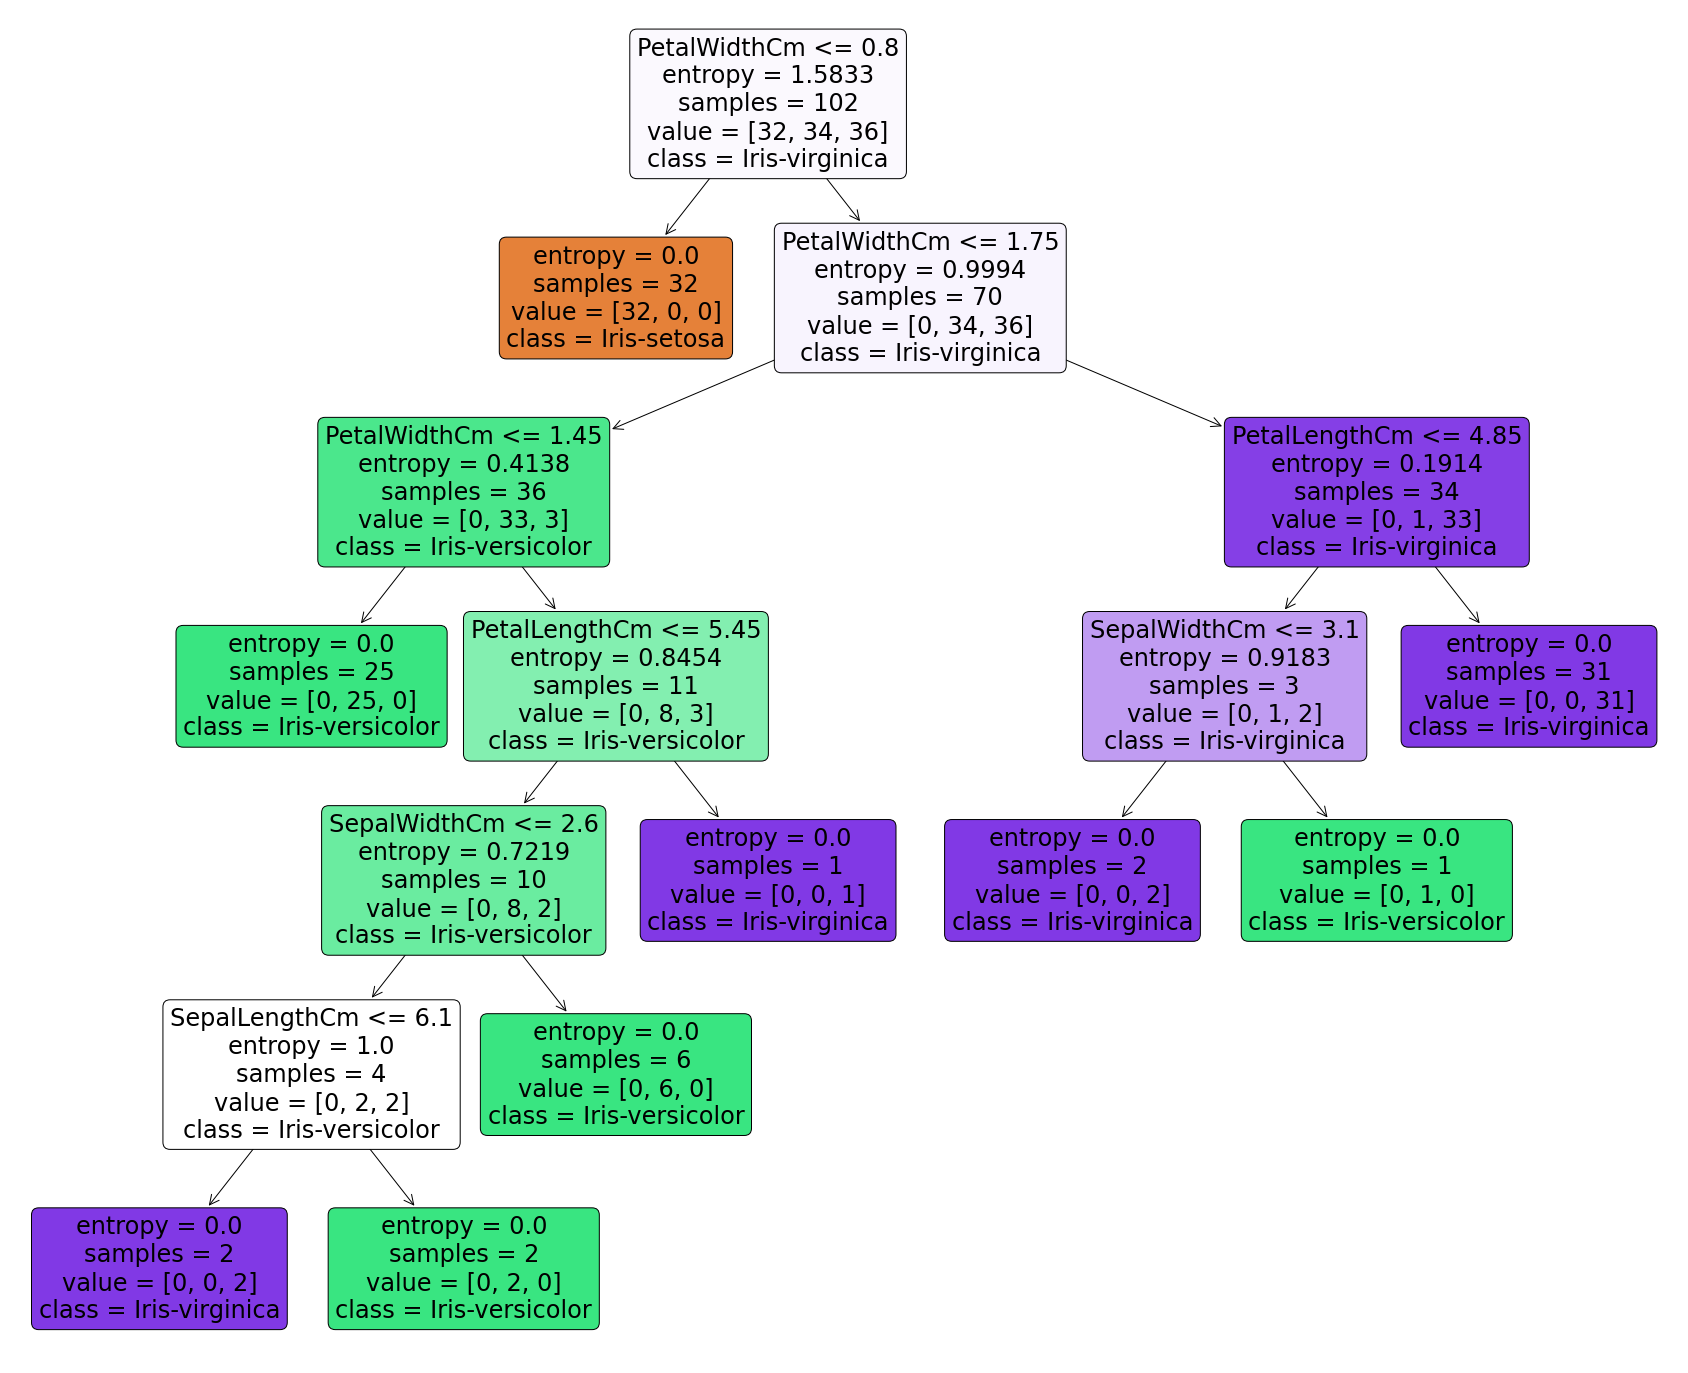

In [81]:
names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
cnames=['Iris-setosa','Iris-versicolor','Iris-virginica']
fig=plt.figure(figsize=(30,25))
tree.plot_tree(DT, feature_names=fnames , class_names=cnames,filled=True ,precision=4,rounded=True)

## Model Evaluation

### Evaluates the performance of the alogorithm



                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.89      1.00      0.94        16
 Iris-virginica       1.00      0.85      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



<AxesSubplot:>

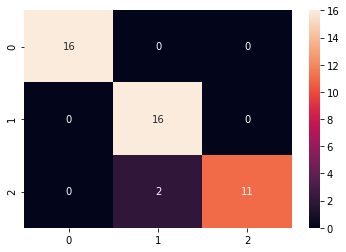

In [85]:
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

As in the  precision ,recall and f1-score are above 85% which means the model is fit and predicted well.


# THANK YOU!!